`March, 22nd 2022`

# **Multiple Linear Regression**

<hr>

**- Analyze diamonds dataset**

     - Carat, depth, table, x, y, z as numerical independent variable
     - Cut, color, clarity as categorical independent variable
     - Price as dependent variable

**- Analyze the relationship**

**- Convert categorical variables into numerical using get_dummies**

**- Use α 5% for hypothesis testing**

**- Check the assumptions & multicollinearity**

**- Interpret the result**


**`Try to find the best model without any multicollinearity, or at least the least one.`**

<hr>


### **Import libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### **Dataset info**
[Diamonds](https://www.kaggle.com/drvader/diamonds-dataset-exploration-and-regression/data)

`A DataFrame with 53940 rows and 10 variables:`

**1. price**<br>
Price in US dollars (\$326 - \$18,823).
<br><br>
**2. carat**<br>
Weight of the diamond (0.2 - 5.01).
<br><br>
**3. cut**<br>
Quality of the cut (Fair, Good, Very Good, Premium, Ideal).
<br><br>
**4. color**<br>
Diamond colour, from J (worst) to D (best).
<br><br>
**5. clarity**<br>
A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
<br><br>
**6. x**<br>
Length in mm (0 - 10.74).
<br><br>
**7. y**<br>
Width in mm (0 - 58.9).
<br><br>
**8. z**<br>
Depth in mm (0 - 31.8).
<br><br>
**9. depth**<br>
Total depth percentage = z / mean(x, y) = 2 * z / (x + y). Range 43 to 79.
<br><br>
**10. table**<br>
Width of top of diamond relative to widest point (43 - 95).

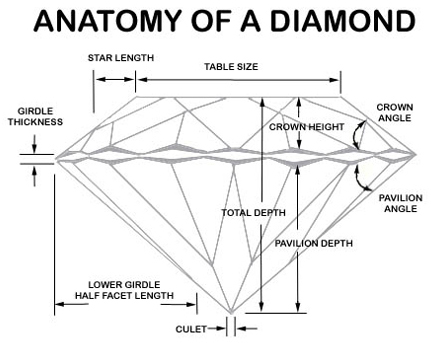

In [2]:
# Load dataset.
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
# Check dataset info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [4]:
# Check numerical features statistical description.
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# Check missing value.
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
# Check data duplicates.
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [7]:
# Drop duplicated data
df.drop_duplicates(inplace=True)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
# Check numerical features correlation.
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


### **Create dummy variables**

In [9]:
# Encoding categorical features.
df_diamonds = pd.get_dummies(df, drop_first=True)
df_diamonds.head()

,carat,depth,table,price,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0


### **Check correlation**

In [10]:
# Check correlation to label.
df_diamonds.corr()['price']

carat            0.921548
depth           -0.011048
table            0.126566
price            1.000000
x                0.884504
y                0.865395
z                0.861208
cut_Premium      0.095561
cut_Very Good    0.006467
cut_Good        -0.001106
cut_Fair         0.017940
color_E         -0.100852
color_F         -0.023989
color_G          0.008811
color_H          0.058766
color_I          0.096283
color_J          0.081899
clarity_VVS1    -0.095106
clarity_VVS2    -0.052215
clarity_VS1     -0.009694
clarity_VS2     -0.000724
clarity_SI1      0.008946
clarity_SI2      0.127639
clarity_I1      -0.000231
Name: price, dtype: float64

### **Select features**

In [11]:
# Check all columns name.
df_diamonds.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Premium',
       'cut_Very Good', 'cut_Good', 'cut_Fair', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_VVS1',
       'clarity_VVS2', 'clarity_VS1', 'clarity_VS2', 'clarity_SI1',
       'clarity_SI2', 'clarity_I1'],
      dtype='object')

#### **Intrepretation**

**x, y, z are not used as a feature since they highly correlate with carat.**

In [12]:
# Creating OLS model.
X = df_diamonds[['carat', 'depth', 'table', 'cut_Good',
       'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2']]
y = df_diamonds['price'] 

sm_lm = sm.OLS(y, sm.add_constant(X))
result = sm_lm.fit()

In [13]:
# Model summary.
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.528e+04
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:31:57   Log-Likelihood:            -4.6059e+05
No. Observations:               53794   AIC:                         9.212e+05
Df Residuals:                   53774   BIC:                         9.214e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2184.9699    388.881      5.619

In [14]:
# Function for calculating VIF.
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Acceptable'] = vif['VIF'].apply(lambda x: 'Yes' if x <= 4 else 'No')

    return(vif)

In [15]:
# Run the calc_vif function.
calc_vif(X)

,Feature,VIF,Acceptable
0,carat,4.933091,No
1,depth,483.474488,No
2,table,504.243842,No
3,cut_Good,1.322838,Yes
4,cut_Fair,1.113750,Yes
5,cut_Premium,2.095661,Yes
6,cut_Very Good,1.716256,Yes
7,color_E,2.455060,Yes
8,color_F,2.438964,Yes
9,color_G,2.763885,Yes


#### **Intrepretation**

As shown in the table above, some features have high VIF values, which indicates a multicollinearity problem. Therefore, it would be good if we start by dropping the features with the highest VIF value, in this case, are 'depth' and 'table.'

**`Improve the model`**

In [16]:
# Rebuild the OLS model with selected features.
X_a = df_diamonds[['carat', 'cut_Good', 'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
                     'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
                     'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y_a = df_diamonds['price']

sm_lm_a = sm.OLS(y_a, sm.add_constant(X_a))
result_a = sm_lm_a.fit()

In [17]:
# Model summary.
print(result_a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 2.817e+04
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:32:00   Log-Likelihood:            -4.6066e+05
No. Observations:               53794   AIC:                         9.214e+05
Df Residuals:                   53776   BIC:                         9.215e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2376.9051     30.976    -76.735

In [18]:
# Run calc_vif function.
calc_vif(X_a)

,Feature,VIF,Acceptable
0,carat,4.686567,No
1,cut_Good,1.245638,Yes
2,cut_Fair,1.090576,Yes
3,cut_Premium,1.693060,Yes
4,cut_Very Good,1.571421,Yes
5,color_E,2.085830,Yes
6,color_F,2.045031,Yes
7,color_G,2.257274,Yes
8,color_H,1.994149,Yes
9,color_I,1.723265,Yes


#### **Intrepretation**

It is improved. Only carat that has VIF score slightly above 4. 

Now, we can try other combinations as follow:
- Combination 1: drop 'cut'.
- Combination 2: drop 'clarity'.

**`Combination 1`**

In [19]:
# OLS model without 'cut' feature.
X_b = df_diamonds[['carat', 'color_E', 'color_F',
                     'color_G', 'color_H', 'color_I', 'color_J', 'clarity_SI1',
                     'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']]
y_b = df_diamonds['price'] 

sm_lm_b = sm.OLS(y_b, sm.add_constant(X_b))
result_b = sm_lm_b.fit()

In [20]:
# Model summary.
print(result_b.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 3.513e+04
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:32:01   Log-Likelihood:            -4.6181e+05
No. Observations:               53794   AIC:                         9.236e+05
Df Residuals:                   53780   BIC:                         9.238e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2548.9711     31.322    -81.379   

In [21]:
# Run calc_vif function.
calc_vif(X_b)

,Feature,VIF,Acceptable
0,carat,4.561990,No
1,color_E,2.072568,Yes
2,color_F,2.031380,Yes
3,color_G,2.245664,Yes
4,color_H,1.984097,Yes
5,color_I,1.720025,Yes
6,color_J,1.419074,Yes
7,clarity_SI1,2.524012,Yes
8,clarity_SI2,2.357300,Yes
9,clarity_VS1,1.962443,Yes


#### **Intrepretation**

Without 'cut' feature, the VIF score of 'carat' is still slightly above 4.

**`Combination 2`**

In [22]:
# OLS model without 'clarity' feature.
X_c = df_diamonds[['carat', 'cut_Good', 'cut_Fair', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
                     'color_G', 'color_H', 'color_I', 'color_J']]
y_c = df_diamonds['price']

sm_lm_c = sm.OLS(y_c, sm.add_constant(X_c))
result_c = sm_lm_c.fit()

In [23]:
# Model summary.
print(result_c.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 3.305e+04
Date:                Wed, 23 Mar 2022   Prob (F-statistic):               0.00
Time:                        09:32:02   Log-Likelihood:            -4.6723e+05
No. Observations:               53794   AIC:                         9.345e+05
Df Residuals:                   53782   BIC:                         9.346e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1956.6615     20.534    -95.288

In [24]:
calc_vif(X_c)

,Feature,VIF,Acceptable
0,carat,3.713563,Yes
1,cut_Good,1.200351,Yes
2,cut_Fair,1.085729,Yes
3,cut_Premium,1.600717,Yes
4,cut_Very Good,1.479296,Yes
5,color_E,1.417174,Yes
6,color_F,1.464847,Yes
7,color_G,1.568666,Yes
8,color_H,1.562320,Yes
9,color_I,1.442913,Yes


#### **Intrepretation**

Dropping the 'clarity' feature solved the multicollinearity problem, and the model still can't explain the 87.1% variance of diamonds price.

### **Check assumptions**

**The assumptions that should be met:**

1. **Linear relationship:** There is linear relationship between independent variable (X) and dependent variable (y).

2. **Independence:** Residuals are independent or have no correlation with other residuals. 

3. **Homoscedasticity:** Residuals have constant variance.

4. **Normality:** Residuals are normally distributed.

#### **Normality assumption**

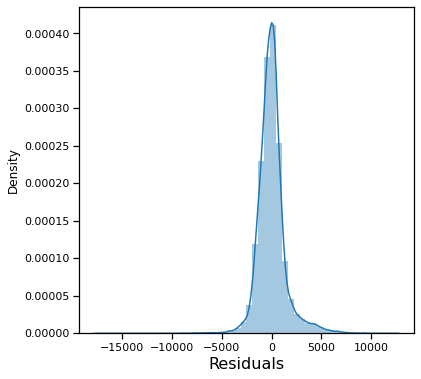

In [25]:
# Residuals distribution.
plt.figure(figsize=(6, 6))
sns.set_context('notebook', font_scale=1)
sns.distplot(result_c.resid)
plt.xlabel('Residuals', fontsize=16);

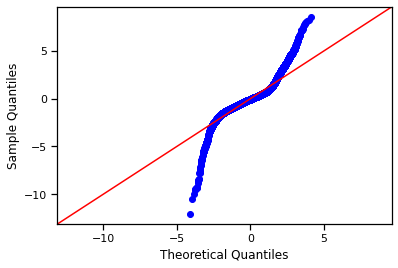

In [26]:
# Validate using QQ plot.
sm.qqplot(result_c.resid, line='45', fit=True);

In [27]:
# Check mean of residuals.
result_c.resid.mean()

1.246598978922331e-11

In [28]:
# Check median of residuals.
result_c.resid.median()

-83.71921250669402

In [29]:
# Check skewness.
result_c.resid.skew()

0.7961144515901585

- Considered as moderately skewed.

In [30]:
# Check kurtosis.
result_c.resid.kurtosis()

8.400067134270529

- Positive excess values of kurtosis (>3) indicate that a distribution is peaked and possess thick tails. Leptokurtic distributions have positive kurtosis values.

- A leptokurtic distribution has a higher peak (thin bell) and taller (i.e. fatter and heavy) tails than a normal distribution.

`How about frequentist test?`

It is not recommended to apply a normal test for a large dataset (e.g., for Shapiro-Wilk is > 5000 samples). There is a tendency that the result would not be normally distributed since no populations are perfectly normally distributed. Therefore, we can use other alternatives, such as a graphical summary or check the skewness value.


**NB:**

It is different with the concept of Central Limit Theorem (CLT). Please keep in mind that you cannot make the blanket assumption that 30 data points or larger will always be normally distributed. The CLT tells you that the MEAN of a sample from a distribution will be normally distributed even if that distribution itself is not normal. That doesn't imply that the sample itself is normally distributed.


In [31]:
# Example using frequentist test for large dataset.

from scipy.stats import normaltest
dp_statistic, dp_pvalue = normaltest(result_c.resid)

if dp_pvalue > 0.05:
    print(f'P-value: {dp_pvalue}. So, we assume residuals follow a normal distribution')
else:
    print(f'P-value: {dp_pvalue}. So, we do not assume residuals follow a normal distribution')

P-value: 0.0. So, we do not assume residuals follow a normal distribution


#### **Interpretation**

The conclusion is residuals are not normally distributed.

#### **Gauss-Markov assumptions**

What we use is the residuals, with assumptions:

- **Independence:** Residuals are independent or have no correlation with other residuals. 

- **Homoscedasticity:** Residuals have constant variance.

- **Normality:** Residuals are normally distributed.

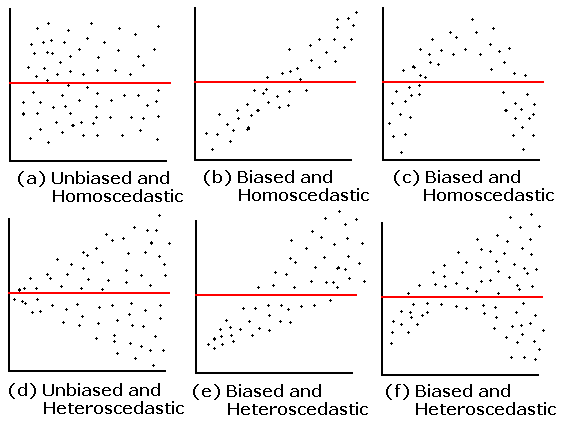

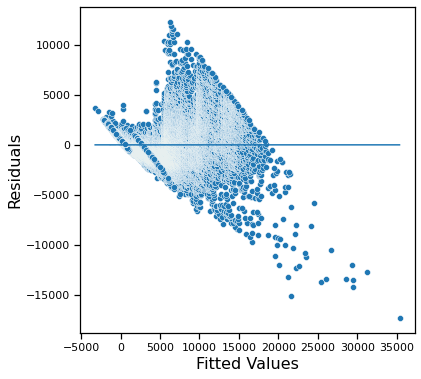

In [32]:
# Scatter plot of fitted values and residuals.
plt.figure(figsize=(6, 6))
sns.set_context('notebook', font_scale=1)
sns.scatterplot(result_c.fittedvalues, result_c.resid)
sns.lineplot(result_c.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize=16)
plt.ylabel('Residuals', fontsize=16);

**RMSE**

In [33]:
np.sqrt(mean_squared_error(y, result_c.predict()))

1431.7053709553784

#### **Interpretation**

1. The residuals are not normally distributed as shown in the QQ-plot and skewness value.
2. The residuals do not spread around 0.
3. According to the reference classification figure, the residuals are biased and homoscedasticity.

In other words, even though there is no multicollinearity problem if we only use `carat`, `cut`, and `color` features and adj. r-squared value that is relatively high, we can not rely on the model prediction result since the assumptions can not be met. Thus, the model may have a bias in its prediction result (depicted by the RMSE value that is quite high). To overcome this problem, we may use non-linear or non-parametric models for whom none of the assumptions should be met.